# **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras import optimizers


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('drive/MyDrive/personality-with-label.csv')
df

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0,0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0,2
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0,2
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,4
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0,3
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0,1
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0,0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0,1


In [4]:
# Statistical measures about the data
df.describe()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10,labels
count,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,...,711963.000000,711963.000000,711963.000000,711963.00000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000,711963.000000
mean,2.675364,3.357805,3.352702,2.823718,2.993576,3.306509,3.886288,2.842194,3.030153,2.768274,...,2.719799,3.800422,3.333387,3.72597,3.744856,3.857605,3.252411,4.340848,4.019911,2.005940
std,1.222582,1.139285,1.192673,1.351908,1.291578,1.288392,1.090061,1.263299,1.236890,1.268118,...,1.220807,1.011567,1.182091,0.89193,1.056115,0.881973,1.184793,0.704847,0.935402,1.302729
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,3.000000,2.000000,3.00000,3.000000,3.000000,2.000000,4.000000,3.000000,1.000000
50%,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,...,3.000000,4.000000,3.000000,4.00000,4.000000,4.000000,3.000000,4.000000,4.000000,2.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,5.000000,4.000000,4.00000,5.000000,5.000000,4.000000,5.000000,5.000000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000


In [5]:
# Checking the distribution of labels
df['labels'].value_counts()

2    181651
1    153575
3    150742
4    114763
0    111232
Name: labels, dtype: int64

In [6]:
df.groupby('labels').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
labels,,,,,,,,,,,,,,,,,,,,,
0,3.648123,4.477857,4.409082,4.071256,3.911006,2.173421,3.018529,1.829105,2.095206,1.644509,...,3.875333,3.213266,3.921569,3.662076,4.046695,4.037822,4.347319,3.393007,4.321544,4.469802
1,2.122780,2.695282,2.806179,2.129298,2.407586,4.303194,4.640723,3.801765,3.846557,3.712759,...,3.381306,2.514550,3.865655,3.311099,3.647508,3.609780,3.594081,3.172040,4.503689,3.851070
2,2.674943,3.428498,3.303593,2.771650,3.090030,2.532169,3.244089,2.171466,2.468662,2.218413,...,3.482667,2.662006,3.631513,3.152270,3.619088,3.764180,3.877766,3.262470,4.145813,3.964646
3,3.251821,3.926205,4.058637,3.540520,3.443174,3.820594,4.402595,3.247827,3.399258,2.873990,...,3.703341,2.970008,4.016406,3.695340,3.979508,3.815997,4.107575,3.315871,4.514787,4.285269
4,1.715483,2.300306,2.210660,1.684724,2.145317,3.621376,4.056090,3.068872,3.247754,3.325044,...,3.143086,2.279001,3.579368,2.855886,3.356265,3.517632,3.375356,3.124413,4.221883,3.548731


# Separating feature and target

In [7]:
X = df.drop(columns='labels', axis=1)
y = df['labels']

# convert cluster into encoding
# Y = pd.get_dummies(y).values

In [8]:
X

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,...,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
0,4.0,5.0,5.0,5.0,4.0,1.0,4.0,2.0,2.0,2.0,...,3.0,2.0,4.0,4.0,4.0,5.0,4.0,3.0,4.0,5.0
1,3.0,3.0,3.0,2.0,1.0,2.0,4.0,1.0,2.0,1.0,...,3.0,3.0,3.0,5.0,3.0,1.0,3.0,2.0,5.0,3.0
2,2.0,4.0,3.0,1.0,2.0,4.0,4.0,2.0,2.0,3.0,...,4.0,3.0,4.0,4.0,2.0,5.0,4.0,3.0,4.0,4.0
3,2.0,2.0,4.0,2.0,1.0,3.0,3.0,2.0,2.0,3.0,...,2.0,1.0,2.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0
4,3.0,3.0,5.0,3.0,3.0,1.0,5.0,1.0,1.0,2.0,...,5.0,3.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711958,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,5.0,4.0,...,2.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,4.0,4.0
711959,4.0,4.0,3.0,4.0,3.0,4.0,5.0,5.0,4.0,5.0,...,3.0,3.0,2.0,2.0,3.0,4.0,5.0,4.0,5.0,4.0
711960,4.0,4.0,5.0,4.0,4.0,3.0,4.0,2.0,4.0,1.0,...,4.0,1.0,1.0,1.0,4.0,5.0,4.0,5.0,4.0,5.0
711961,2.0,3.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0,4.0,...,4.0,2.0,4.0,4.0,4.0,5.0,3.0,5.0,5.0,3.0


In [9]:
y

0         0
1         2
2         2
3         4
4         0
         ..
711958    3
711959    1
711960    0
711961    1
711962    3
Name: labels, Length: 711963, dtype: int64

# Splitting data into training and testing

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X.shape, X_train.shape, X_test.shape)

(711963, 25) (569570, 25) (142393, 25)


# Training

In [11]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(25,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')  # Jumlah output sesuai dengan jumlah klaster kepribadian
])

learning_rate = 0.01 / 100000  # Learning rate yang lebih kecil
optimizer = optimizers.RMSprop(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 11,909
Trainable params: 11,909
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Evaluasi model pada set pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Akurasi:", accuracy)

4450/4450 [==============================] - 17s 4ms/step - loss: 2.2332 - accuracy: 0.1563
Loss: 2.2332193851470947
Akurasi: 0.15632790327072144


In [14]:
history = model.fit(X_train, y_train, epochs=60, batch_size=160, validation_data=(X_test, y_test))

Epoch 1/60
3560/3560 [==============================] - 9s 2ms/step - loss: 2.1673 - accuracy: 0.1556 - val_loss: 2.1042 - val_accuracy: 0.1574
Epoch 2/60
3560/3560 [==============================] - 10s 3ms/step - loss: 2.0494 - accuracy: 0.1587 - val_loss: 1.9969 - val_accuracy: 0.1637
Epoch 3/60
3560/3560 [==============================] - 10s 3ms/step - loss: 1.9516 - accuracy: 0.1691 - val_loss: 1.9077 - val_accuracy: 0.1784
Epoch 4/60
3560/3560 [==============================] - 8s 2ms/step - loss: 1.8695 - accuracy: 0.1882 - val_loss: 1.8319 - val_accuracy: 0.2021
Epoch 5/60
3560/3560 [==============================] - 10s 3ms/step - loss: 1.7990 - accuracy: 0.2132 - val_loss: 1.7659 - val_accuracy: 0.2273
Epoch 6/60
3560/3560 [==============================] - 11s 3ms/step - loss: 1.7370 - accuracy: 0.2370 - val_loss: 1.7077 - val_accuracy: 0.2499
Epoch 7/60
3560/3560 [==============================] - 9s 2ms/step - loss: 1.6822 - accuracy: 0.2579 - val_loss: 1.6562 - val_accur

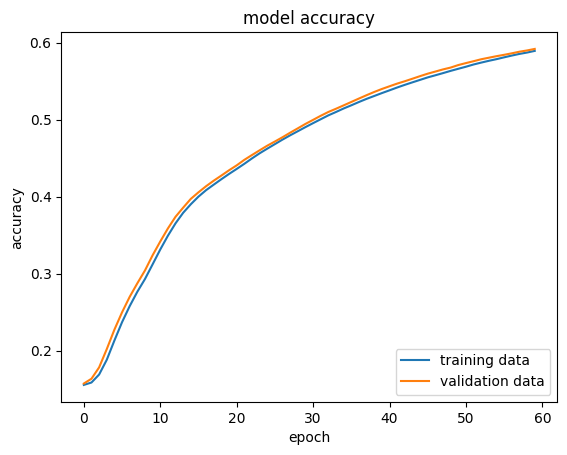

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

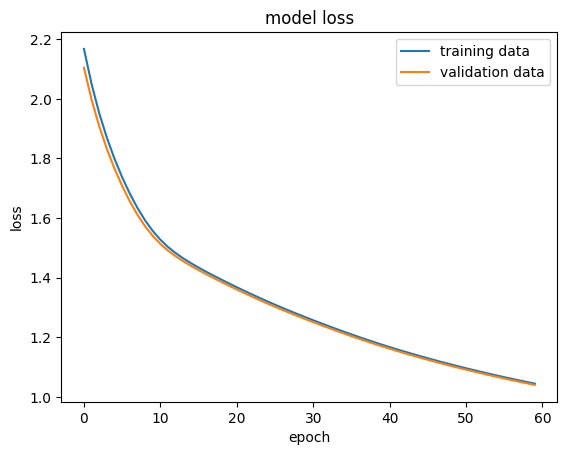

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [22]:
my_data = [2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2]
my_data = np.array(my_data).reshape(1, -1)

In [23]:
predictions = model.predict(my_data)
predicted_clusters = np.argmax(predictions, axis=1)
print(predicted_clusters)

1/1 [==============================] - 0s 31ms/step
[1]
